# Week 2 Empirical Evidence

In [2]:
import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
data = sio.loadmat('MSFT_20141103.mat')

In [4]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [19]:
bestbid=bid[:,0]
bestbid

array([46.73, 46.75, 46.8 , ..., 47.43, 47.43, 47.43])

In [20]:
bestask=ask[:,0]

In [21]:
bestask

array([46.75, 46.8 , 46.81, ..., 47.44, 47.44, 47.44])

In [22]:
import pandas as pd

In [26]:
df=pd.DataFrame(np.transpose([bestbid,bestask]))

In [28]:
df.index=t
df.columns=['bid','ask']

In [30]:
df.head

<bound method NDFrame.head of            bid    ask
0.1      46.73  46.75
0.2      46.75  46.80
0.3      46.80  46.81
0.4      46.80  46.88
0.5      46.80  46.87
...        ...    ...
23399.6  47.43  47.44
23399.7  47.43  47.44
23399.8  47.43  47.44
23399.9  47.43  47.44
23400.0  47.43  47.44

[234000 rows x 2 columns]>

In [31]:
df['midprice']=(df['bid']+df['ask'])*0.5

In [32]:
df['spread'] = df['ask']-df['bid']

In [33]:
df['askvol']=np.transpose(askvol[:,0])

In [34]:
df['bidvol']=np.transpose(bidvol[:,0])

In [35]:
df.head

<bound method NDFrame.head of            bid    ask  midprice  spread   askvol  bidvol
0.1      46.73  46.75    46.740    0.02   2995.0   100.0
0.2      46.75  46.80    46.775    0.05   1814.0   100.0
0.3      46.80  46.81    46.805    0.01    668.0   986.0
0.4      46.80  46.88    46.840    0.08    955.0  2882.0
0.5      46.80  46.87    46.835    0.07    100.0  3136.0
...        ...    ...       ...     ...      ...     ...
23399.6  47.43  47.44    47.435    0.01  51525.0  4500.0
23399.7  47.43  47.44    47.435    0.01  58125.0  2300.0
23399.8  47.43  47.44    47.435    0.01  59925.0   407.0
23399.9  47.43  47.44    47.435    0.01  59925.0   407.0
23400.0  47.43  47.44    47.435    0.01  60025.0   407.0

[234000 rows x 6 columns]>

In [37]:
df['microprice']=(df['bid']*df['askvol']+df['ask']*df['bidvol'])/(df['askvol']+df['bidvol'])

In [38]:
df.head

<bound method NDFrame.head of            bid    ask  midprice  spread   askvol  bidvol  microprice
0.1      46.73  46.75    46.740    0.02   2995.0   100.0   46.730646
0.2      46.75  46.80    46.775    0.05   1814.0   100.0   46.752612
0.3      46.80  46.81    46.805    0.01    668.0   986.0   46.805961
0.4      46.80  46.88    46.840    0.08    955.0  2882.0   46.860089
0.5      46.80  46.87    46.835    0.07    100.0  3136.0   46.867837
...        ...    ...       ...     ...      ...     ...         ...
23399.6  47.43  47.44    47.435    0.01  51525.0  4500.0   47.430803
23399.7  47.43  47.44    47.435    0.01  58125.0  2300.0   47.430381
23399.8  47.43  47.44    47.435    0.01  59925.0   407.0   47.430067
23399.9  47.43  47.44    47.435    0.01  59925.0   407.0   47.430067
23400.0  47.43  47.44    47.435    0.01  60025.0   407.0   47.430067

[234000 rows x 7 columns]>

In [43]:
secdf = df.iloc[::10, :]

In [44]:
secdf.head

<bound method NDFrame.head of            bid    ask  midprice  spread   askvol   bidvol  microprice
0.1      46.73  46.75    46.740    0.02   2995.0    100.0   46.730646
1.1      46.77  46.82    46.795    0.05    500.0     18.0   46.771737
2.1      46.76  46.79    46.775    0.03    400.0    200.0   46.770000
3.1      46.76  46.79    46.775    0.03    474.0  10200.0   46.788668
4.1      46.76  46.78    46.770    0.02    300.0   8200.0   46.779294
...        ...    ...       ...     ...      ...      ...         ...
23395.1  47.43  47.44    47.435    0.01   1758.0   7250.0   47.438048
23396.1  47.43  47.44    47.435    0.01   2300.0   2400.0   47.435106
23397.1  47.44  47.45    47.445    0.01  10522.0   2000.0   47.441597
23398.1  47.44  47.45    47.445    0.01  27999.0   1100.0   47.440378
23399.1  47.43  47.44    47.435    0.01  22258.0   3800.0   47.431458

[23400 rows x 7 columns]>

In [45]:
secdf['return']=secdf['midprice'].pct_change()*100

C:\Users\evely\AppData\Local\Temp\ipykernel_19048\479470845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secdf['return']=secdf['midprice'].pct_change()*100


In [46]:
secdf.head

<bound method NDFrame.head of            bid    ask  midprice  spread   askvol   bidvol  microprice  \
0.1      46.73  46.75    46.740    0.02   2995.0    100.0   46.730646   
1.1      46.77  46.82    46.795    0.05    500.0     18.0   46.771737   
2.1      46.76  46.79    46.775    0.03    400.0    200.0   46.770000   
3.1      46.76  46.79    46.775    0.03    474.0  10200.0   46.788668   
4.1      46.76  46.78    46.770    0.02    300.0   8200.0   46.779294   
...        ...    ...       ...     ...      ...      ...         ...   
23395.1  47.43  47.44    47.435    0.01   1758.0   7250.0   47.438048   
23396.1  47.43  47.44    47.435    0.01   2300.0   2400.0   47.435106   
23397.1  47.44  47.45    47.445    0.01  10522.0   2000.0   47.441597   
23398.1  47.44  47.45    47.445    0.01  27999.0   1100.0   47.440378   
23399.1  47.43  47.44    47.435    0.01  22258.0   3800.0   47.431458   

           return  
0.1           NaN  
1.1      0.117672  
2.1     -0.042740  
3.1      0.00

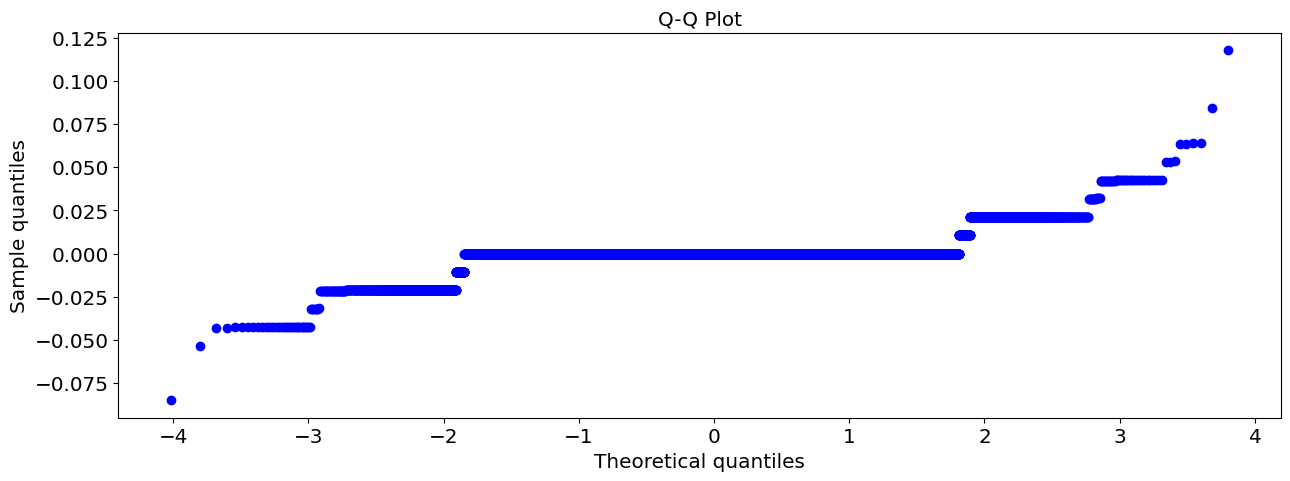

In [47]:
import scipy.stats as stats
import matplotlib.pyplot as plt
res = stats.probplot(secdf['return'], dist="norm", plot=plt)

plt.title('Q-Q Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')

# Show the plot
plt.show()

In [57]:
secdf

,bid,ask,midprice,spread,askvol,bidvol,microprice,return
0.1,46.73,46.75,46.740,0.02,2995.0,100.0,46.730646,NaN
1.1,46.77,46.82,46.795,0.05,500.0,18.0,46.771737,0.117672
2.1,46.76,46.79,46.775,0.03,400.0,200.0,46.770000,-0.042740
3.1,46.76,46.79,46.775,0.03,474.0,10200.0,46.788668,0.000000
4.1,46.76,46.78,46.770,0.02,300.0,8200.0,46.779294,-0.010689
...,...,...,...,...,...,...,...,...
23395.1,47.43,47.44,47.435,0.01,1758.0,7250.0,47.438048,0.000000
23396.1,47.43,47.44,47.435,0.01,2300.0,2400.0,47.435106,0.000000
23397.1,47.44,47.45,47.445,0.01,10522.0,2000.0,47.441597,0.021081
23398.1,47.44,47.45,47.445,0.01,27999.0,1100.0,47.440378,0.000000


In [69]:
df['return']=df['midprice'].pct_change()*100
non_zero_count1 = (df['return'] != 0).sum()
non_zero_count1

2169

In [70]:
mindf = df.iloc[::600, :]

In [71]:
mindf['return']=mindf['midprice'].pct_change()*100

C:\Users\evely\AppData\Local\Temp\ipykernel_19048\4191481559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mindf['return']=mindf['midprice'].pct_change()*100


In [72]:
non_zero_count2 = (mindf['return'] != 0).sum()
non_zero_count2

280

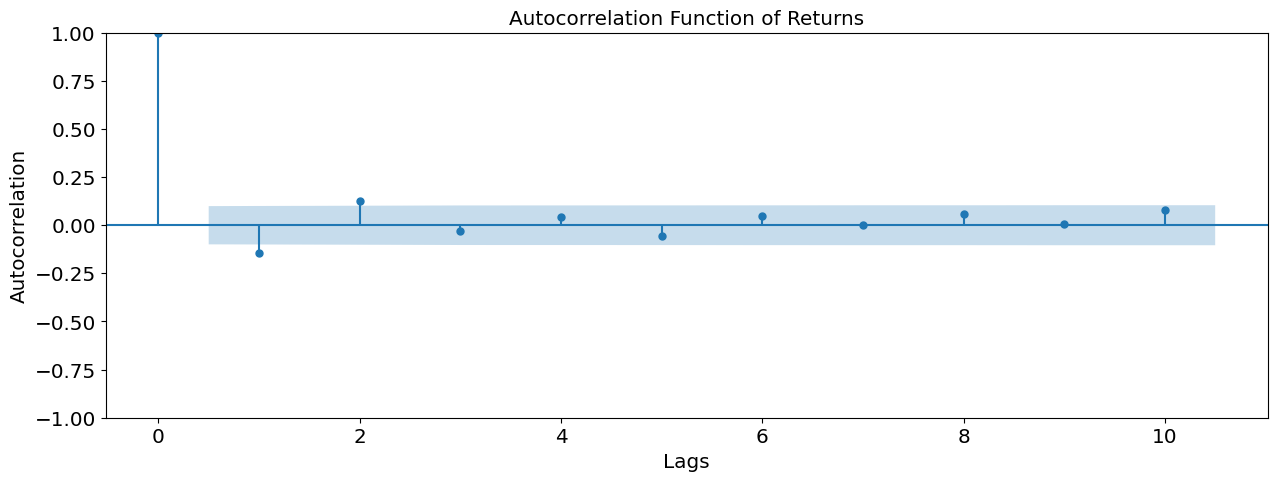

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mindf['return'].dropna(), lags=10, alpha=0.05)

# Display the plot
plt.title('Autocorrelation Function of Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()